In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

<AxesSubplot: >

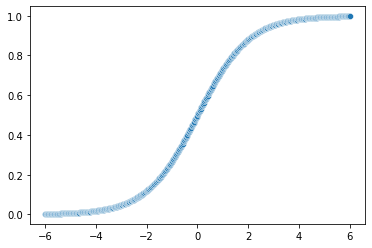

In [7]:
def logistic(t):
    return 1.0/(1+np.exp(-t))

x = np.linspace(-6,6,500)

y = np.array([logistic(t) for t in x])
sns.scatterplot(x=x,y=y)

In [9]:
df = pd.read_csv('affairs.csv')

In [13]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [14]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [15]:
def affair_check(x):
    if x != 0:
        return 1
    else:
        return 0

In [16]:
df['Had_Affair'] = df['affairs'].apply(affair_check)

In [17]:
df.drop('affairs',axis=1,inplace=True)

In [18]:
df.groupby('Had_Affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
Had_Affair,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559


<AxesSubplot: xlabel='age', ylabel='Count'>

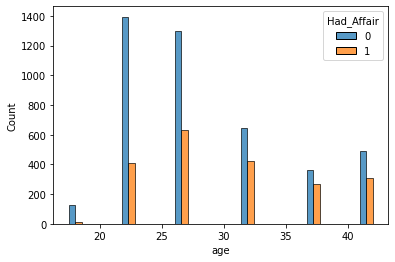

In [20]:
sns.histplot(df,x='age',hue='Had_Affair',multiple='dodge')

<AxesSubplot: xlabel='yrs_married', ylabel='Count'>

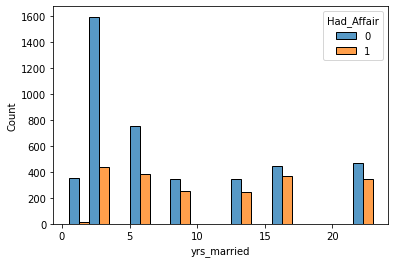

In [21]:
sns.histplot(df,x='yrs_married',hue='Had_Affair',multiple='dodge')

<AxesSubplot: xlabel='children', ylabel='Count'>

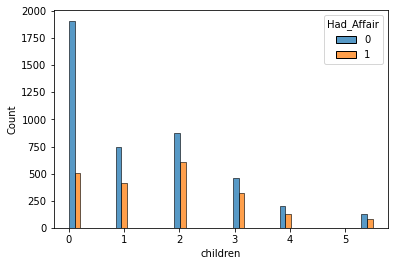

In [22]:
sns.histplot(df,x='children',hue='Had_Affair',multiple='dodge')

<AxesSubplot: xlabel='educ', ylabel='Count'>

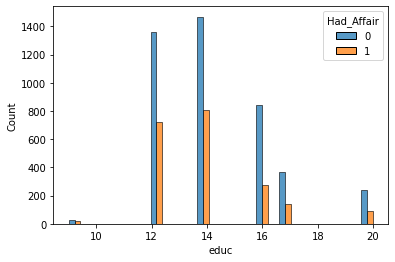

In [23]:
sns.histplot(df,x='educ',hue='Had_Affair',multiple='dodge')

In [24]:
occ_dummies = pd.get_dummies(df['occupation'])

In [25]:
hocc_dummies = pd.get_dummies(df['occupation_husb'])

In [26]:
occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']


In [27]:
hocc_dummies.columns = ['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']


In [28]:
X = df.drop(['occupation','occupation_husb','Had_Affair'],axis=1)


In [29]:
dummies = pd.concat([occ_dummies,hocc_dummies],axis=1)


In [30]:
X = pd.concat([X,dummies],axis=1)

In [31]:
X.head()


,rate_marriage,age,yrs_married,children,religious,educ,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,0,1,0,0,0,0,0,0,1,0,0


In [32]:
Y = df.Had_Affair

Y.tail()

6361    0
6362    0
6363    0
6364    0
6365    0
Name: Had_Affair, dtype: int64

In [33]:
X = X.drop(['occ1','hocc1'],axis=1)

In [34]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0


In [35]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_Affair, dtype: int64

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
log_model = LogisticRegression()
log_model.fit(X,Y)

/home/vtex/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
log_model.score(X,Y)

0.7268300345585925

In [39]:
Y.mean()

0.3224945020420987

In [42]:
coeff_df = pd.DataFrame(zip(X.columns,np.transpose(log_model.coef_)))


In [43]:
coeff_df

,0,1
0,rate_marriage,[-0.6967743638058641]
1,age,[-0.0544347799591268]
2,yrs_married,[0.10211695383626788]
3,children,[0.009100858808927328]
4,religious,[-0.3600783853000101]
5,educ,[0.01964712802592405]
6,occ2,[0.34771599214593146]
7,occ3,[0.5741860913194686]
8,occ4,[0.2955280063147896]
9,occ5,[0.9380868292847325]


In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)


In [46]:
log_model2 = LogisticRegression()

log_model2.fit(X_train,Y_train)

/home/vtex/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
class_predict = log_model2.predict(X_test)


In [50]:
from sklearn import metrics
print(metrics.accuracy_score(Y_test,class_predict))


0.7305276381909548
